<a href="https://colab.research.google.com/github/jojimenezt/MineriaDatos2022-2/blob/main/Proyecto_Mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.stats import trim_mean
from numpy import mean, absolute
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# R
%load_ext rpy2.ipython

In [ ]:
%%R
url <-'https://raw.githubusercontent.com/jojimenezt/MineriaDatos2022-2/main/datasets/Weather%20Training%20Data.csv'
weather <- read.csv('https://raw.githubusercontent.com/jojimenezt/MineriaDatos2022-2/main/datasets/Weather%20Training%20Data.csv')

In [ ]:
url = 'https://raw.githubusercontent.com/jojimenezt/MineriaDatos2022-2/main/datasets/Weather%20Training%20Data.csv'
weather = pd.read_csv(url)
weather.head(8)

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
5,Row5,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0
6,Row6,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,1
7,Row7,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,1


In [ ]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


In [ ]:
weather.describe

<bound method NDFrame.describe of           row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0           Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1           Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2           Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3           Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4           Row4   Albury      7.7     26.7       0.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
99511  Row101816    Uluru      8.0     20.7       0.0          NaN       NaN   
99512  Row101817    Uluru      3.5     21.8       0.0          NaN       NaN   
99513  Row101818    Uluru      2.8     23.4       0.0          NaN       NaN   
99514  Row101819    Uluru      3.6     25.3       0.0          NaN       NaN   
99515  Row101820    Uluru      5.4     26.9       0.0          NaN       NaN   

     

In [ ]:
attr_cont =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
            'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RainTomorrow']
attr_cat = [ 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
for attr in attr_cont:
  print(attr)
  print(str(np.min(weather[attr])) + ', ' + str(np.max(weather[attr])))

MinTemp
-8.5, 33.9
MaxTemp
-4.1, 48.1
Rainfall
0.0, 371.0
Evaporation
0.0, 86.2
Sunshine
0.0, 14.5
WindGustSpeed
6.0, 135.0
WindSpeed9am
0.0, 130.0
WindSpeed3pm
0.0, 87.0
Humidity9am
0.0, 100.0
Humidity3pm
0.0, 100.0
Pressure9am
980.5, 1041.0
Pressure3pm
978.2, 1039.6
Cloud9am
0.0, 9.0
Cloud3pm
0.0, 9.0
Temp9am
-7.0, 40.2
Temp3pm
-5.1, 46.7
RainTomorrow
0, 1


In [ ]:
np.unique(weather['Location'])

array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

In [ ]:
weather.mean(axis = 0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MinTemp            12.176266
MaxTemp            23.218513
Rainfall            2.353024
Evaporation         5.461320
Sunshine            7.615090
WindGustSpeed      39.976966
WindSpeed9am       14.004849
WindSpeed3pm       18.650464
Humidity9am        68.866376
Humidity3pm        51.433296
Pressure9am      1017.684638
Pressure3pm      1015.286204
Cloud9am            4.447985
Cloud3pm            4.519122
Temp9am            16.970041
Temp3pm            21.681340
RainTomorrow        0.224677
dtype: float64

In [ ]:
weather.median(axis = 0) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.4
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.7
Pressure3pm      1015.3
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
RainTomorrow        0.0
dtype: float64

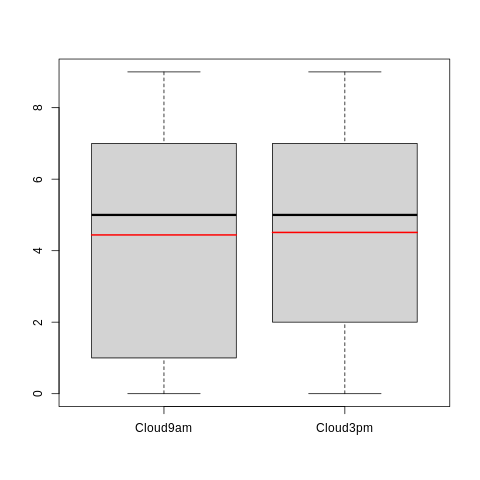

In [ ]:
%%R
#boxplot
boxplot(weather$Cloud9am, weather$Cloud3pm, names=c('Cloud9am', 'Cloud3pm'))
segments(x0 = 0.6, y0 = 4.44,
         x1 = 1.4, y1 = 4.44,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 4.51,
         x1 = 2.4, y1 = 4.51,
        col = "red", lwd = 2)

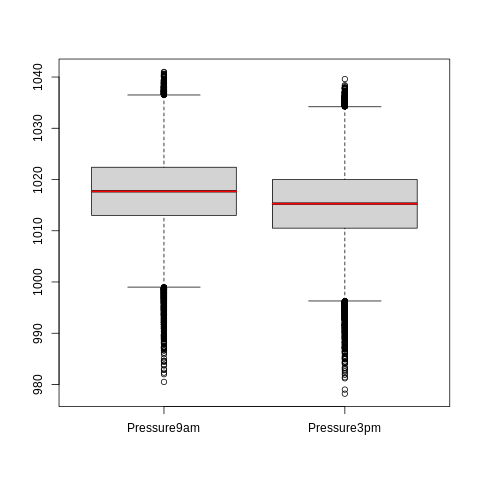

In [ ]:
%%R
#boxplot
boxplot(weather$Pressure9am, weather$Pressure3pm, names=c('Pressure9am', 'Pressure3pm'))
segments(x0 = 0.6, y0 = 1017.68,
         x1 = 1.4, y1 = 1017.68,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 1015.28,
         x1 = 2.4, y1 = 1015.28,
        col = "red", lwd = 2)

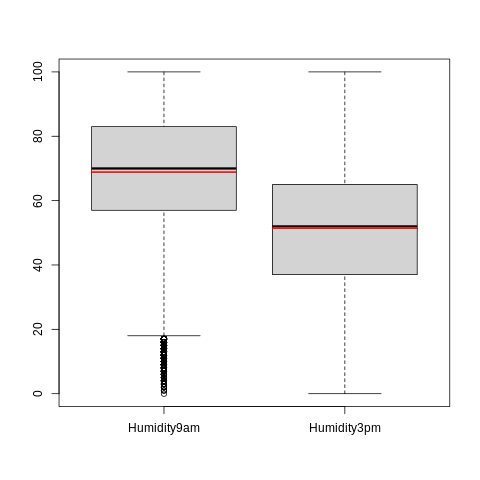

In [ ]:
%%R
#boxplot
boxplot(weather$Humidity9am, weather$Humidity3pm, names=c('Humidity9am', 'Humidity3pm'))
segments(x0 = 0.6, y0 = 68.86,
         x1 = 1.4, y1 = 68.86,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 51.43,
         x1 = 2.4, y1 = 51.43,
        col = "red", lwd = 2)

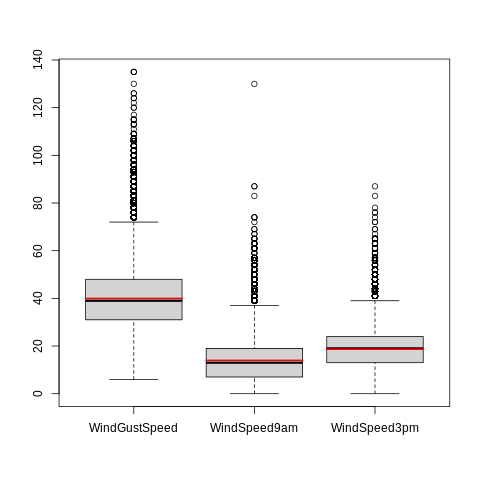

In [ ]:
%%R
#boxplot
boxplot(weather$WindGustSpeed, weather$WindSpeed9am, weather$WindSpeed3pm, names=c('WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'))
segments(x0 = 0.6, y0 = 39.976,
         x1 = 1.4, y1 = 39.976,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 14.00,
         x1 = 2.4, y1 = 14.00,
        col = "red", lwd = 2)
segments(x0 = 2.6, y0 = 18.65,
         x1 = 3.4, y1 = 18.65,
        col = "red", lwd = 2)

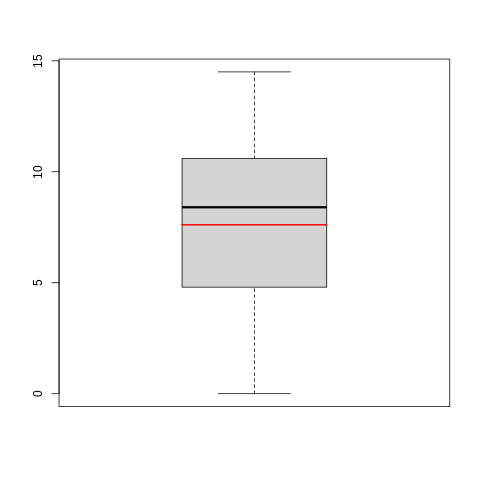

In [ ]:
%%R
#boxplot
boxplot(weather$Sunshine, names=c('Sunshine'))
segments(x0 = 0.8, y0 = 7.61,
      x1 = 1.2, y1 = 7.61,
  col = "red", lwd = 2)


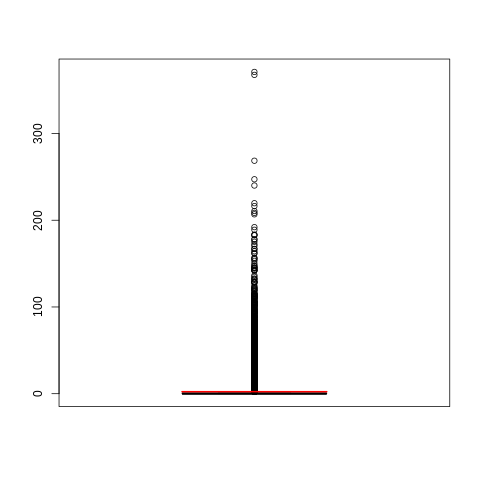

In [ ]:
%%R
#boxplot
boxplot(weather$Rainfall, names=c('Rainfall'))
segments(x0 = 0.8, y0 = 2.35,
      x1 = 1.2, y1 = 2.35,
  col = "red", lwd = 2)


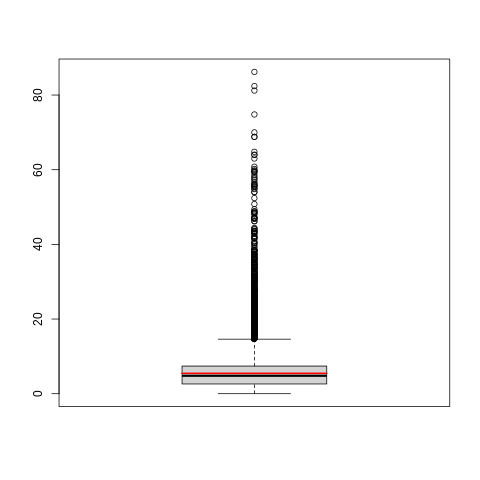

In [ ]:
%%R
#boxplot
boxplot(weather$Evaporation, names=c('Evaporation'))
segments(x0 = 0.8, y0 = 5.46,
      x1 = 1.2, y1 = 5.46,
  col = "red", lwd = 2)

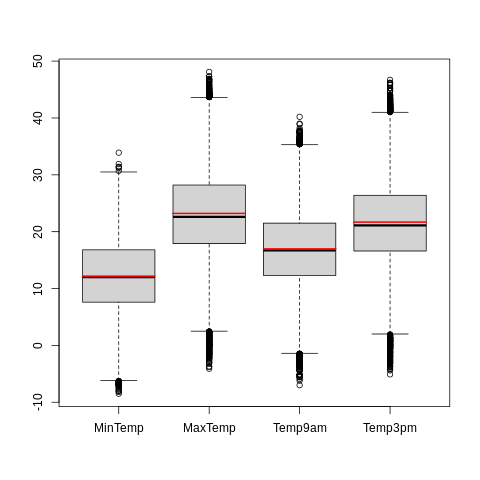

In [ ]:
%%R
#boxplot
boxplot(weather$MinTemp, weather$MaxTemp, weather$Temp9am, weather$Temp3pm, names=c('MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm'))
segments(x0 = 0.6, y0 = 12.17,
         x1 = 1.4, y1 = 12.17,
        col = "red", lwd = 2)
segments(x0 = 1.6, y0 = 23.21,
         x1 = 2.4, y1 = 23.21,
        col = "red", lwd = 2)
segments(x0 = 2.6, y0 = 16.97,
         x1 = 3.4, y1 = 16.97,
        col = "red", lwd = 2)
segments(x0 = 3.6, y0 = 21.68,
         x1 = 4.4, y1 = 21.68,
        col = "red", lwd = 2)

In [ ]:
weather.cov()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
MinTemp,40.843376,33.488552,5.640261,12.585653,1.785577,15.689379,10.121122,9.807046,-28.822105,0.581958,-20.385834,-20.660841,1.352234,0.310679,37.359616,31.348208,0.225371
MaxTemp,33.488552,50.624255,-4.470651,17.512030,12.318712,6.977176,1.143536,3.187617,-68.518712,-74.906725,-16.619081,-21.106056,-5.948445,-5.347877,40.790338,48.283632,-0.474026
Rainfall,5.640261,-4.470651,72.043865,-1.823210,-7.603737,15.288255,6.640317,4.550123,35.908538,44.603792,-10.094187,-7.525253,5.263545,4.255359,0.648897,-4.634141,0.841889
Evaporation,12.585653,17.512030,-1.823210,17.326327,5.079167,11.545281,7.014464,4.526855,-39.909971,-33.579978,-8.086146,-8.746139,-2.198895,-1.984557,15.038275,16.639419,-0.198931
Sunshine,1.785577,12.318712,-7.603737,5.079167,14.311147,-1.428984,0.385411,1.811396,-34.925209,-48.164561,1.006272,-0.581251,-7.145780,-7.032409,7.119548,12.572063,-0.712150
WindGustSpeed,15.689379,6.977176,15.288255,11.545281,-1.428984,184.457781,72.219261,80.860619,-57.266688,-8.079437,-43.990958,-39.347139,2.658196,3.926667,13.658726,3.412670,1.321666
WindSpeed9am,10.121122,1.143536,6.640317,7.014464,0.385411,72.219261,79.251346,40.376572,-46.596028,-5.870756,-14.395499,-10.988690,0.591753,1.280453,7.639265,0.475347,0.338798
WindSpeed3pm,9.807046,3.187617,4.550123,4.526855,1.811396,80.860619,40.376572,77.472162,-24.584651,2.849884,-18.289374,-15.623335,1.402026,0.651345,9.315282,1.716704,0.326011
Humidity9am,-28.822105,-68.518712,35.908538,-39.909971,-34.925209,-57.266688,-46.596028,-24.584651,363.853769,264.023037,19.247359,25.378026,24.517703,18.139006,-58.768740,-66.187730,2.034891
Humidity3pm,0.581958,-74.906725,44.603792,-33.579978,-48.164561,-8.079437,-5.870756,2.849884,264.023037,431.709335,-3.563701,7.867994,30.667927,29.316436,-29.864326,-80.372740,3.852779


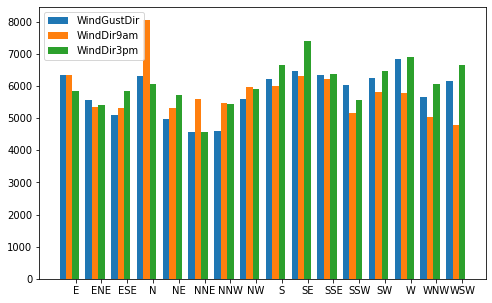

In [ ]:
w=-0.5
x=np.arange(16)
plt.rcParams["figure.figsize"] = (8,5)
a = weather.groupby('WindDir3pm').size().keys()
for attr in attr_cat:
  plt.bar(x+w,weather.groupby(attr).size(),width=0.25)
  w+=0.25
plt.xticks(x, a)
plt.legend(attr_cat)



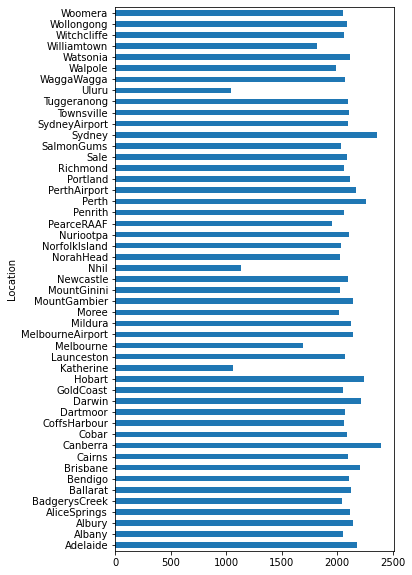

In [ ]:
location = weather.groupby('Location').size()
plt.rcParams["figure.figsize"] = (5,10)
location.plot.barh()


# Preprocesamiento
## Numero de datos faltantes

In [ ]:
weather = weather.replace('?',np.NaN)

print('Number of instances = %d' % (weather.shape[0]))
print('Number of attributes = %d' % (weather.shape[1]))

print('Number of missing values:')
for col in weather.columns:
    print('\t%s: %d' % (col,weather[col].isna().sum()))

Number of instances = 99516
Number of attributes = 23
Number of missing values:
	row ID: 0
	Location: 0
	MinTemp: 443
	MaxTemp: 230
	Rainfall: 979
	Evaporation: 42531
	Sunshine: 47317
	WindGustDir: 6521
	WindGustSpeed: 6480
	WindDir9am: 7006
	WindDir3pm: 2648
	WindSpeed9am: 935
	WindSpeed3pm: 1835
	Humidity9am: 1233
	Humidity3pm: 2506
	Pressure9am: 9748
	Pressure3pm: 9736
	Cloud9am: 37572
	Cloud3pm: 40002
	Temp9am: 614
	Temp3pm: 1904
	RainToday: 979
	RainTomorrow: 0


In [ ]:
weather2 = weather.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1)
weather2

,row ID,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Row101816,Uluru,8.0,20.7,0.0,ESE,41.0,SE,E,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,No,0
99512,Row101817,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,0
99513,Row101818,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,0
99514,Row101819,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,0


In [ ]:
numerica= weather2.drop(['row ID','Location','WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday','RainTomorrow'],axis=1)
categorica=weather2.drop(['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1)

In [ ]:
numerica = numerica.fillna(numerica.mean())
categorica = categorica.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
weather2  = pd.concat([numerica, categorica], axis=1)
weather2

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,row ID,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,Row0,Albury,W,W,WNW,No,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,Row1,Albury,WNW,NNW,WSW,No,0
2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,Row2,Albury,W,ENE,NW,No,0
3,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,Row3,Albury,WNW,W,W,No,0
4,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,Row4,Albury,W,SSE,W,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,8.0,20.7,0.0,41.0,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0,Row101816,Uluru,ESE,SE,E,No,0
99512,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,Row101817,Uluru,E,ESE,E,No,0
99513,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,Row101818,Uluru,E,SE,ENE,No,0
99514,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,Row101819,Uluru,NNW,SE,N,No,0


In [ ]:
for col in weather2.columns:
    print('\t%s: %d' % (col,weather2[col].isna().sum()))

	MinTemp: 0
	MaxTemp: 0
	Rainfall: 0
	WindGustSpeed: 0
	WindSpeed9am: 0
	WindSpeed3pm: 0
	Humidity9am: 0
	Humidity3pm: 0
	Pressure9am: 0
	Pressure3pm: 0
	Temp9am: 0
	Temp3pm: 0
	row ID: 0
	Location: 0
	WindGustDir: 0
	WindDir9am: 0
	WindDir3pm: 0
	RainToday: 0
	RainTomorrow: 0


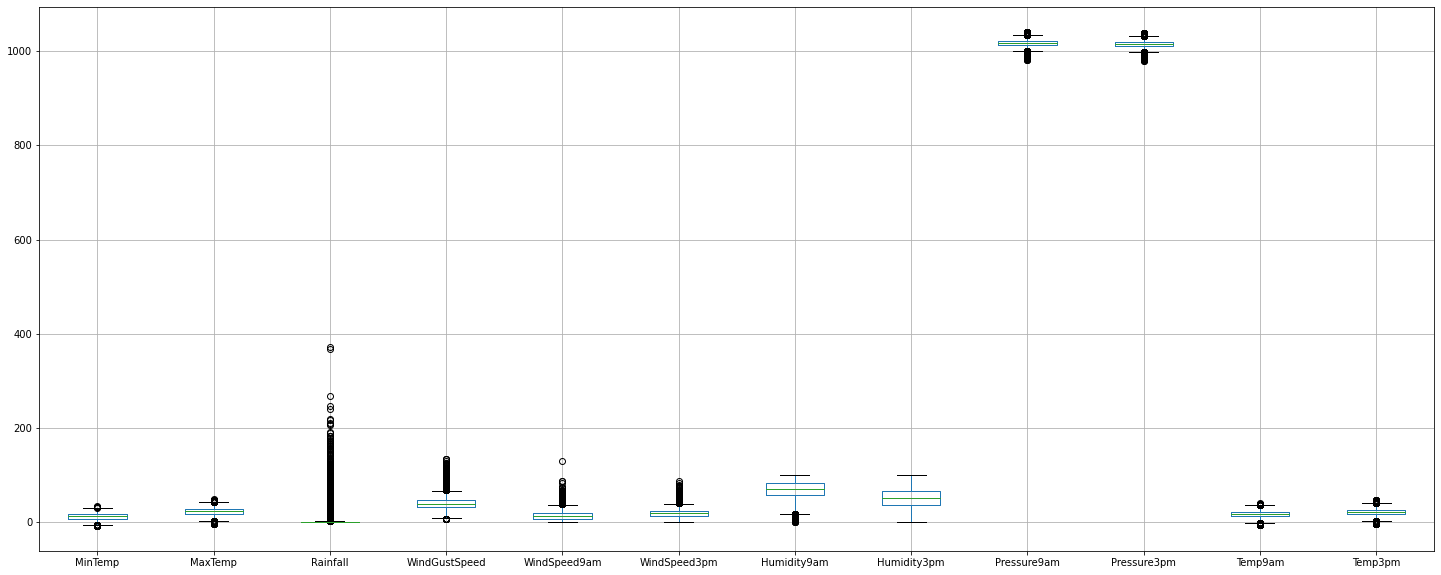

In [ ]:
weatherOut = weather2.drop(['RainTomorrow'],axis=1)
numerica.boxplot(figsize=(25,10))
numerica2=weather2

In [ ]:
Z = (numerica-numerica.mean())/numerica.std()
Z

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.191909,-0.044818,-0.207556,0.306356,0.676623,0.613458,0.112554,-1.434767,-1.478558,-1.223339,-0.010827,0.017285
1,-0.749025,0.264743,-0.278596,0.306356,-1.129164,0.384108,-1.311766,-1.288528,-1.049117,-1.118732,0.035548,0.381448
2,0.834881,1.277851,-0.160197,0.077905,-0.790579,0.154758,0.692833,-0.898557,-1.019500,-1.387722,0.128300,1.168041
3,0.380096,0.912006,-0.254916,1.220162,0.563761,0.613458,-0.731487,-1.386021,-1.256433,-1.477386,0.561139,1.051509
4,-0.701979,0.489878,-0.278596,-0.378998,-0.903441,-0.189267,-1.100755,-1.581006,-0.634483,-0.775022,-0.103579,0.556246
...,...,...,...,...,...,...,...,...,...,...,...,...
99511,-0.654932,-0.354378,-0.278596,0.077905,0.563761,0.842808,-0.678735,-0.947303,1.542341,1.347014,-0.830131,-0.244913
99512,-1.360633,-0.199598,-0.278596,-0.683600,0.112314,-0.647967,-0.520477,-1.191035,1.038858,0.883752,-1.170219,-0.113814
99513,-1.470408,0.025537,-0.278596,-0.683600,-0.113409,-0.877317,-0.942498,-1.337274,1.024050,0.749257,-1.062009,0.104684
99514,-1.344950,0.292885,-0.278596,-1.368954,-0.113409,-1.106667,-0.678735,-1.483514,0.861158,0.569930,-0.938340,0.410581


In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==12) & ((Z <= 3).sum(axis=1)==12),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 99516
Number of rows after discarding missing values = 94698


In [ ]:
dups = weather2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
numerica

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3
2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7
3,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9
4,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5
...,...,...,...,...,...,...,...,...,...,...,...,...
99511,8.0,20.7,0.0,41.0,19.0,26.0,56.0,32.0,1028.1,1024.3,11.6,20.0
99512,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9
99513,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4
99514,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5


In [ ]:
continuas = [['MinTemp', 10], ['MaxTemp', 10], ['WindGustSpeed', 10], ['WindSpeed9am', 10], ['WindSpeed3pm', 10],
             ['Humidity9am', 10], ['Humidity3pm', 10], ['Pressure9am', 10], ['Pressure3pm', 10], ['Temp9am', 10],
             ['Temp3pm', 10]]

numerica_dis = numerica

for var in continuas:
  var_dis = KBinsDiscretizer(n_bins=var[1],encode='ordinal',strategy='quantile')
  numerica_dis[[var[0]]]=var_dis.fit_transform(numerica_dis[[var[0]]])
  print(var[0], var_dis.bin_edges_[0])

MinTemp [-8.5  4.   6.6  8.6 10.3 12.  13.7 15.7 18.  20.8 33.9]
MaxTemp [-4.1 14.5 16.9 18.9 20.7 22.7 24.7 26.9 29.6 32.9 48.1]
WindGustSpeed [  6.  24.  30.  33.  35.  39.  41.  44.  50.  57. 135.]
WindSpeed9am [  0.   4.   6.   9.  11.  13.  15.  19.  20.  26. 130.]
WindSpeed3pm [ 0.          9.         11.         13.         15.         18.65046427
 20.         22.         26.         30.         87.        ]
Humidity9am [  0.  44.  54.  60.  65.  70.  75.  80.  86.  94. 100.]
Humidity3pm [  0.          23.          33.          41.          47.
  51.43329554  57.          62.          69.          79.
 100.        ]
Pressure9am [ 980.5        1009.2        1012.4        1014.7        1016.7
 1017.68463818 1018.7        1020.7        1023.1        1026.3
 1041.        ]
Pressure3pm [ 978.2        1006.8        1009.8        1012.2        1014.2
 1015.28620422 1016.2        1018.3        1020.7        1023.9
 1039.6       ]
Temp9am [-7.   8.9 11.3 13.2 15.  16.7 18.4 20.4 22.7 25.

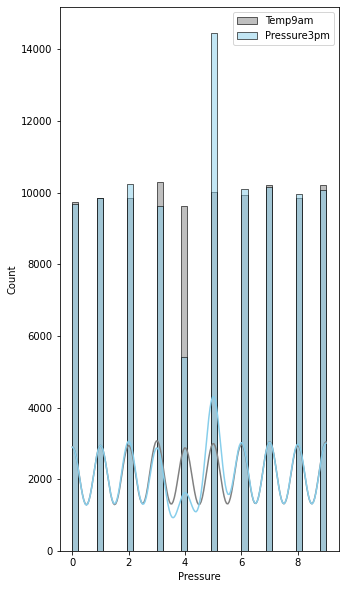

In [ ]:
sns.histplot(data=numerica, x="Temp9am", color="gray", label="Temp9am", kde=True)
sns.histplot(data=numerica, x="Pressure3pm", color="skyblue", label="Pressure3pm", kde=True)
#sns.histplot(data=numerica, x="WindGustSpeed", color="red", label="WindGustSpeed", kde=True)
#sns.histplot(data=numerica, x="Temp3pm", color="purple", label="Temp3pm", kde=True)

plt.legend()
plt.xlabel('Pressure') 
plt.show()

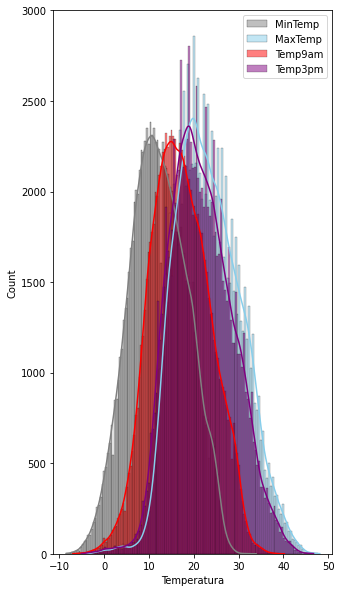

In [ ]:
sns.histplot(data=weather, x="MinTemp", color="gray", label="MinTemp", kde=True)
sns.histplot(data=weather, x="MaxTemp", color="skyblue", label="MaxTemp", kde=True)
sns.histplot(data=weather, x="Temp9am", color="red", label="Temp9am", kde=True)
sns.histplot(data=weather, x="Temp3pm", color="purple", label="Temp3pm", kde=True)

plt.legend()
plt.xlabel('Temperatura') 
plt.show()

# PCA

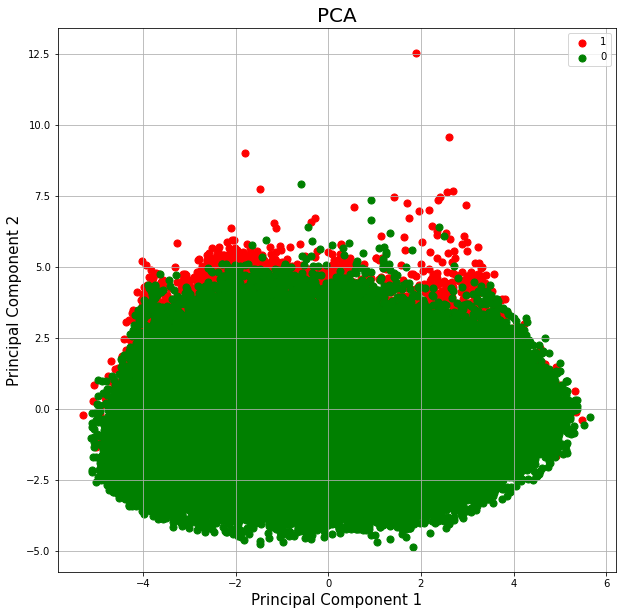

In [ ]:
target=categorica.drop(['row ID','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'],axis=1)
categorica2=categorica.drop(['row ID','RainTomorrow'],axis=1)
cat2num=pd.get_dummies(categorica2, drop_first=True)

weather2Num=pd.concat([numerica,cat2num],axis=1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Separamos la columna clase o objetivo de todo el conjunto de datos
x = weather2Num.loc[:,weather2Num.columns != 'Target'].values
#y = weather2Num.loc[:,['Target']].values

#Estandarizamos la informacion
x= pd.DataFrame(StandardScaler().fit_transform(x))
y=pd.DataFrame(target)
# Se crea el objeto PCA
pca = PCA(n_components=2)

#Corremos PCA sobre el conjunto de datos X el cual no tiene la clase del df weather.
pComp=pca.fit_transform(x)

principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf

finalDf = pd.concat([principalDf, target], axis = 1)
finalDf.head()
# Graficamos el conjunto de datos

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['RainTomorrow'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#dftotal = pd.concat([numerica_dis, categorica], axis=1).drop(['RainTomorrow'], axis=1)
dftotal =  categorica.merge(numerica_dis, left_index=True, right_index=True)
dftotal = dftotal.drop(['RainTomorrow', 'row ID'], axis=1)

In [ ]:
dftotal

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,Albury,W,W,WNW,No,5.0,5.0,0.6,7.0,8.0,7.0,5.0,0.0,0.0,1.0,5.0,5.0
1,Albury,WNW,NNW,WSW,No,2.0,6.0,0.0,7.0,1.0,7.0,1.0,1.0,1.0,1.0,5.0,6.0
2,Albury,W,ENE,NW,No,7.0,8.0,1.0,6.0,2.0,6.0,7.0,2.0,1.0,0.0,5.0,8.0
3,Albury,WNW,W,W,No,6.0,8.0,0.2,8.0,7.0,7.0,2.0,1.0,1.0,0.0,7.0,8.0
4,Albury,W,SSE,W,No,2.0,6.0,0.0,4.0,2.0,4.0,1.0,0.0,2.0,2.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99511,Uluru,ESE,SE,E,No,2.0,4.0,0.0,6.0,7.0,8.0,2.0,1.0,9.0,9.0,2.0,4.0
99512,Uluru,E,ESE,E,No,0.0,4.0,0.0,2.0,6.0,3.0,2.0,1.0,8.0,8.0,1.0,4.0
99513,Uluru,E,SE,ENE,No,0.0,5.0,0.0,2.0,5.0,2.0,1.0,1.0,8.0,7.0,1.0,5.0
99514,Uluru,NNW,SE,N,No,0.0,6.0,0.0,0.0,5.0,1.0,2.0,0.0,8.0,7.0,1.0,6.0


In [ ]:
muestreo_feat_selec = pd.DataFrame(dftotal.sample(n=100, random_state=123, axis=0, ignore_index=True))
muestreo_feat_selec

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,Hobart,S,SW,S,Yes,5.0,1.0,4.8,9.0,3.0,9.0,8.0,9.0,0.0,0.0,3.0,0.0
1,Portland,WSW,SW,SW,No,2.0,1.0,0.8,2.0,6.0,3.0,8.0,9.0,9.0,9.0,2.0,1.0
2,Newcastle,W,N,SE,Yes,3.0,1.0,3.2,5.0,0.0,0.0,9.0,9.0,5.0,5.0,2.0,1.0
3,Sale,ENE,WNW,ENE,No,3.0,6.0,0.0,5.0,4.0,7.0,4.0,6.0,2.0,4.0,5.0,6.0
4,Darwin,NE,ENE,NNW,Yes,9.0,9.0,1.8,6.0,4.0,7.0,5.0,7.0,0.0,0.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Perth,ENE,E,E,No,5.0,7.0,0.0,6.0,6.0,4.0,1.0,1.0,2.0,1.0,6.0,7.0
96,Brisbane,E,E,ENE,No,9.0,7.0,0.0,0.0,3.0,1.0,2.0,7.0,6.0,6.0,9.0,7.0
97,Hobart,NNW,NNW,NW,No,5.0,5.0,0.0,9.0,8.0,7.0,1.0,2.0,1.0,1.0,4.0,4.0
98,CoffsHarbour,E,SW,SE,Yes,5.0,2.0,29.4,7.0,7.0,6.0,8.0,9.0,8.0,7.0,3.0,2.0


In [ ]:
def hamming(v1,v2):
  h=0
  for i in range(v1.size):
    
    if v1[i] == v2[i]:
      h=h+1
  
  return h/v1.size

def entropia(h):
  if h == 0 or h == 1:
    entropia = 0
  else:
    entropia = ( h*np.log10(h)) + ( (1-h)*np.log10(1-h) )
  return entropia

def entropiaTotal(df):
  entroTotal=0
  for i in range(df.shape[0]):
    ent=0
    for j in range(df.shape[0]):
      ham = hamming(df.loc[i], df.loc[j])
      ent = ent + entropia(ham)    
    entroTotal = entroTotal + ent
  
  return -entroTotal/2

def del_col(df):
  e_total = entropiaTotal(df)
  columnas = df.columns.values
  ganancias = []
  for i in columnas:
      ganancia = abs(e_total - entropiaTotal(df.drop(i, axis=1)))
      ganancias.append(ganancia)

  dic_ganancias = {columnas:ganancias for (columnas,ganancias) in zip(columnas,ganancias)}
  dic_ganancias['Entropia_total']= e_total
  col_sel = columnas[ganancias.index(min(ganancias))]
  print('se elimina la columna:'+str(col_sel)+ ' con ganancias: ' + str(dic_ganancias))
  return df.drop(col_sel, axis=1)

def ranking(df):
  new_df = del_col(df)
  i=0
  while i < new_df.shape[1]:
      new_df = del_col(new_df)
      i += 1
  return new_df

In [ ]:
ranking(muestreo_feat_selec)

se elimina la columna:WindSpeed3pm con ganancias: {'Location': 22.990759471452748, 'WindGustDir': 13.236564495279254, 'WindDir9am': 11.860776150183483, 'WindDir3pm': 14.097895044629468, 'RainToday': 143.99116085853905, 'MinTemp': 4.834959030505615, 'MaxTemp': 10.521683984623223, 'Rainfall': 56.81068590684515, 'WindGustSpeed': 2.2353975650917164, 'WindSpeed9am': 2.352894601323669, 'WindSpeed3pm': 0.22712095558222245, 'Humidity9am': 5.510329998092061, 'Humidity3pm': 6.7189960813001335, 'Pressure9am': 3.4134117890122297, 'Pressure3pm': 4.408024481219741, 'Temp9am': 8.060400296916896, 'Temp3pm': 10.54500813474499, 'Entropia_total': 780.3815459173052}
se elimina la columna:WindGustSpeed con ganancias: {'Location': 24.100020218431496, 'WindGustDir': 13.76755846047115, 'WindDir9am': 12.511339361517571, 'WindDir3pm': 14.77107358955243, 'RainToday': 152.4214074248482, 'MinTemp': 5.1280302982654575, 'MaxTemp': 11.430670097372285, 'Rainfall': 59.343960130761616, 'WindGustSpeed': 1.597469034529240

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MaxTemp,Rainfall,Temp3pm
0,Hobart,S,SW,S,Yes,1.0,4.8,0.0
1,Portland,WSW,SW,SW,No,1.0,0.8,1.0
2,Newcastle,W,N,SE,Yes,1.0,3.2,1.0
3,Sale,ENE,WNW,ENE,No,6.0,0.0,6.0
4,Darwin,NE,ENE,NNW,Yes,9.0,1.8,9.0
...,...,...,...,...,...,...,...,...
95,Perth,ENE,E,E,No,7.0,0.0,7.0
96,Brisbane,E,E,ENE,No,7.0,0.0,7.0
97,Hobart,NNW,NNW,NW,No,5.0,0.0,4.0
98,CoffsHarbour,E,SW,SE,Yes,2.0,29.4,2.0


In [ ]:
def error(x):
    ER = 0
    for e in x:
      err = abs(e-x.mean())
      ER = ER+err
    return ER

i2 = numerica["MinTemp"].sample(n=70, random_state=1)
i2_sort = np.sort(i2)

for i in range(1, i2_sort.size):
    bin1 = i2_sort[0:i]
    bin2 = i2_sort[i:i2_sort.size]
    print('bin1=' + str(bin1) + ' y bin2=' + str(bin2) 
      + ' con ER=' + str(error(bin1)  + error(bin2)))